# Lab Segmentation 2

In [14]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


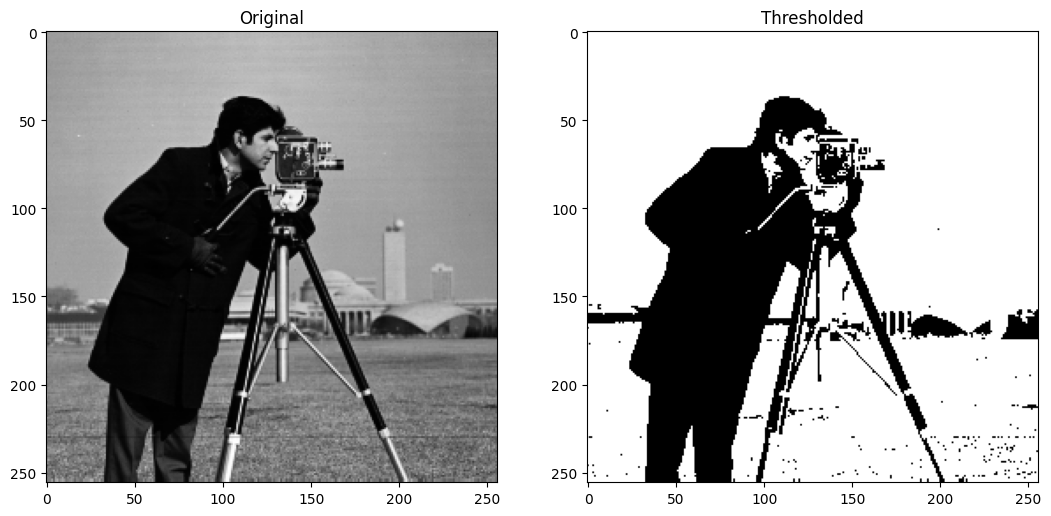

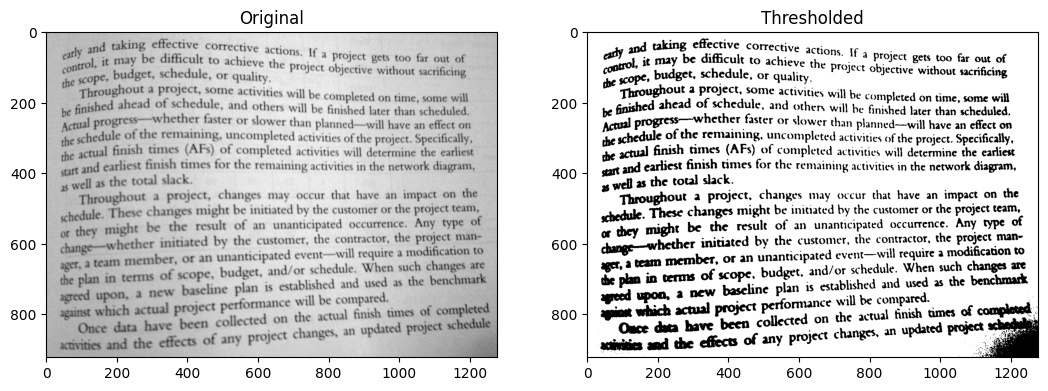

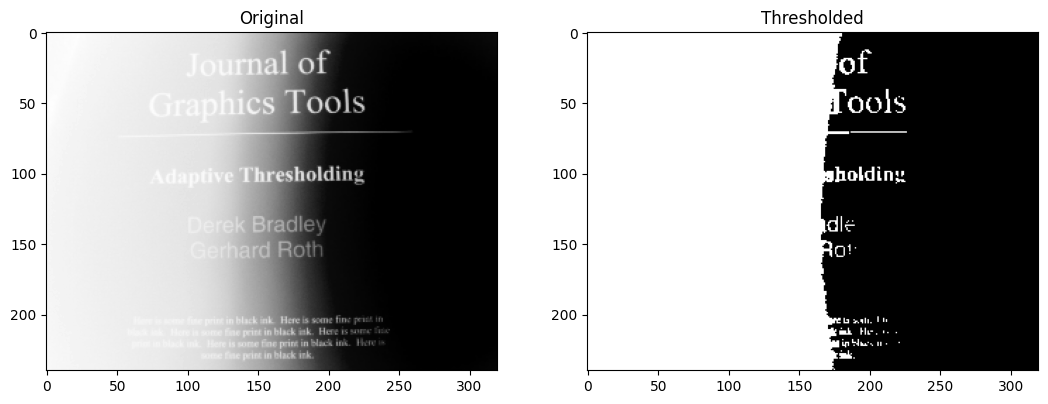

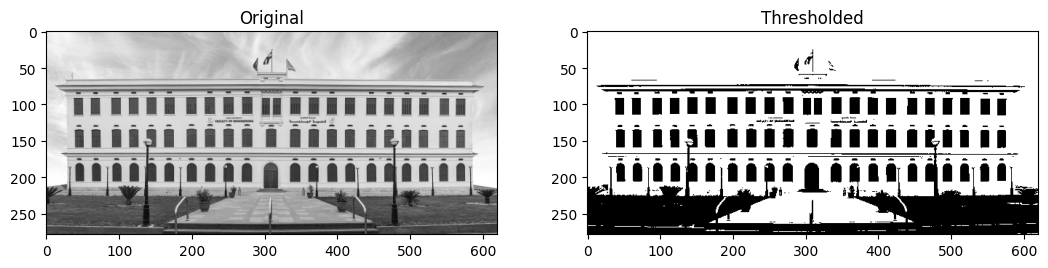

In [15]:
def getThreshold(img):
    '''that func will work only with grey scale images'''
    hist ,centers = histogram(img, nbins=256)
    counts = np.zeros(256)
    for i in range(len(centers)):
        counts[centers[i]] = hist[i]
    def getMean(arr, start=0):
        total_pixels = np.sum(arr)
        mul = 0
        
        if(total_pixels!= 0):
            for i in range(len(arr)):
                mul += (i + start) * arr[i] / total_pixels
                
        return round(mul)
    
    T = getMean(counts)
    while(True):
        T_prev = int(T)
        lower = getMean(counts[:T], start=0) if T > 0 else 0
        higher = getMean(counts[T:], start=T) if T < 255 else 255
        T = round((lower + higher) / 2)
        if(T == T_prev):
            return T
        
    
    
    
    
def hist_automatic(img):
    T = getThreshold(img)
    ret_img = np.zeros(img.shape)
    ret_img[img >= T] = 255
    return ret_img

# TODO: Make the retirval of images more generic
img = io.imread('./cameraman.png',as_gray=True)    
ret_img = hist_automatic(img)
show_images([img,ret_img],['Original','Thresholded'])

img2 = (io.imread('./book1.png',as_gray=True) * 255).astype(np.uint8)
ret_img = hist_automatic(img2)
show_images([img2,ret_img],['Original','Thresholded'])

img3 = (io.imread('./book.png',as_gray=True) * 255).astype(np.uint8)
ret_img = hist_automatic(img3)
show_images([img3,ret_img],['Original','Thresholded'])

img4 = (io.imread('./cufe.png',as_gray=True) * 255).astype(np.uint8)
ret_img = hist_automatic(img4)
show_images([img4,ret_img],['Original','Thresholded'])



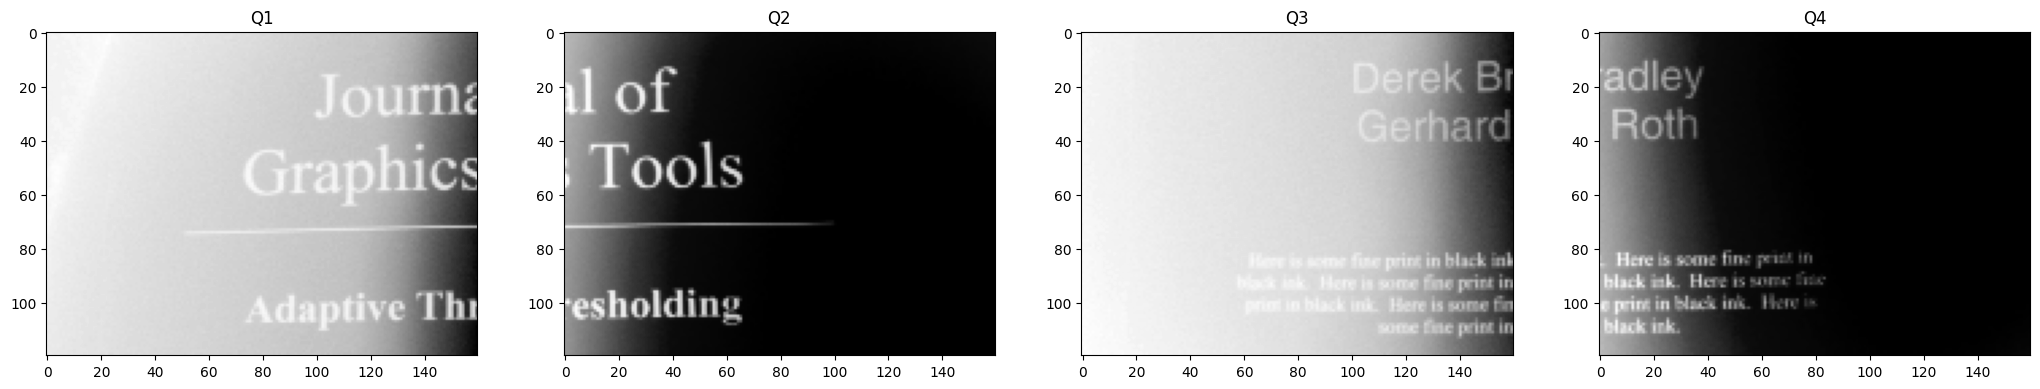

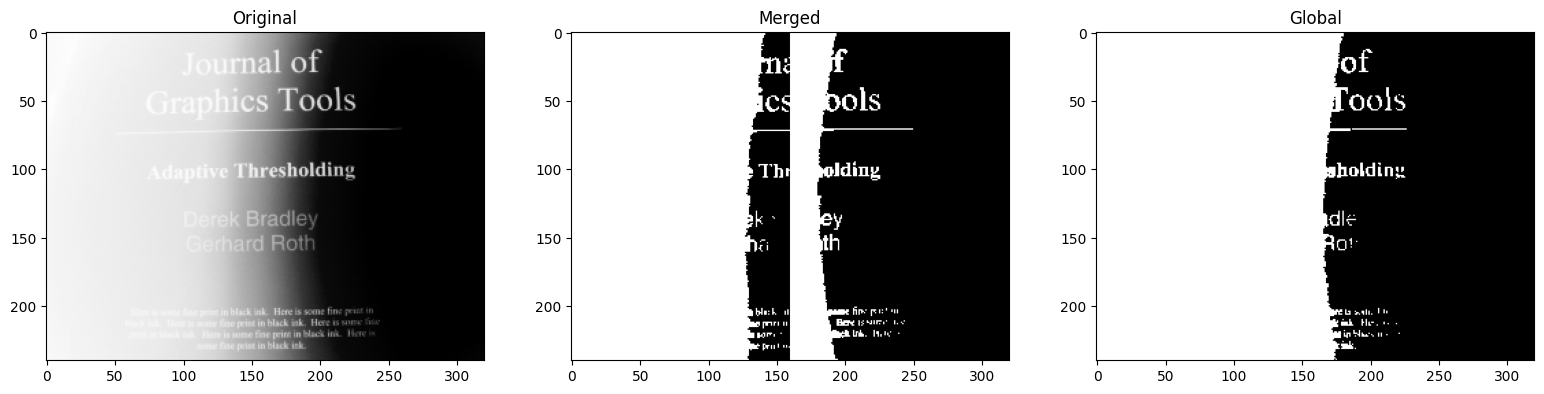

In [16]:
# REQ 1
img = (io.imread('./book.png',as_gray=True) * 255).astype(np.uint8)
w,h = img.shape

q1 = img[:w//2,:h//2]
q2 = img[:w//2,h//2:]
q3 = img[w//2:,:h//2]
q4 = img[w//2:,h//2:]
show_images([q1,q2,q3,q4],['Q1','Q2','Q3','Q4'])
ret1 = hist_automatic(q1)
ret2 = hist_automatic(q2)
ret3 = hist_automatic(q3)
ret4 = hist_automatic(q4)
merged = np.zeros(img.shape)
merged[:w//2,:h//2] = ret1
merged[:w//2,h//2:] = ret2
merged[w//2:,:h//2] = ret3
merged[w//2:,h//2:] = ret4

global_thres = hist_automatic(img)
show_images([img,merged,global_thres],['Original','Merged','Global'])


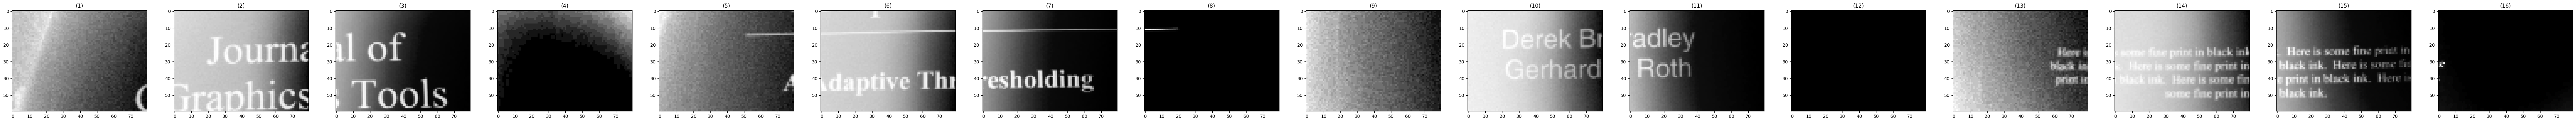

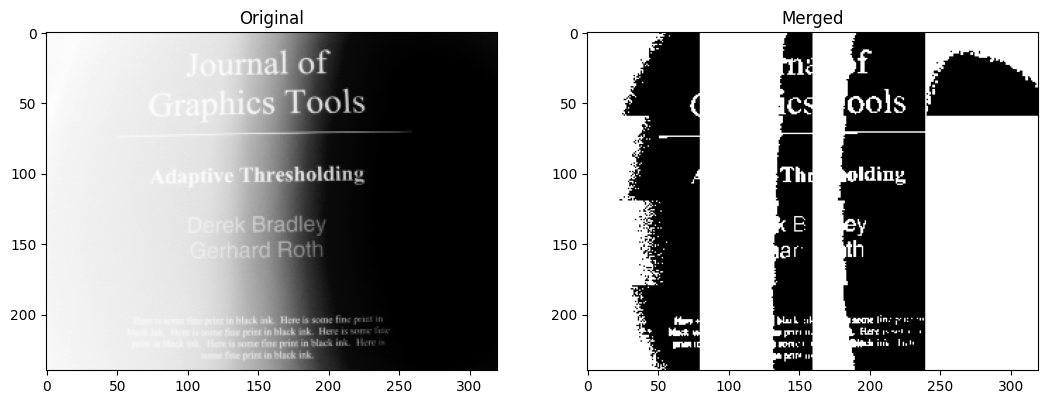

In [17]:
# By deviding it into more parts 

from heapq import merge


def divide_im(img, n = 4):
    w,h = img.shape
    parts = []
    for i in range(n):
        for j in range(n):
            parts.append(img[ i*w//n:(i+1)*w//n , j*h//n:(j+1)*h//n ])
    return parts

def merge_im(parts, n = 4):
    w,h = parts[0].shape
    merged = np.zeros((w*n,h*n))
    for i in range(n):
        for j in range(n):
            merged[i*w:(i+1)*w,j*h:(j+1)*h] = parts[i*n + j]
    return merged

img = (io.imread('./book.png',as_gray=True) * 255).astype(np.uint8)
parts = divide_im(img,n=4)

show_images(parts)
ret_parts = []
i = 0
for part in parts:
    ret_parts.append(hist_automatic(part))

out = merge_im(ret_parts,n=4)
show_images([img,out],['Original','Merged'])